In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
gptResponses = pd.read_csv('/Volumes/Extreme SSD/Thesis_Project/Data/finetune_data/ORPO/ORPO_dataset.csv')
df = pd.read_csv("/Volumes/Extreme SSD/Thesis_Project/Data/translation_data/testimony_final.csv")

In [4]:
df.head()

,input,output,instruction,Label
0,"""Eijsch crimineel ter dood op ende tegens den ...","""Eijsch crimineel to death against the Christi...",instruction,1
1,"""Eisch crimineel ter dood, gedaan, en gemaakt ...","""Eisch crimineel to death, done, and made and ...",instruction,1
2,"""op ende tegens""","""against""",instruction,1
3,"""Fernando rooms cristen en Mocqua inwoonder to...","""Fernando, Roman Christian and Mocqua, residen...",instruction,1
4,"""E:E: achtb: heeren, Den eijsscher zegt en is ...","""Honourable lords,\nThe eijsscher says and is ...",instruction,1


In [5]:
gptResponses.head()

,system,prompt,chosen,rejected
0,You are a helpful assistant designed to help u...,Please translate the following early modern Du...,"""Eijsch crimineel to death against the Christi...","""Criminal demand for death upon and against th..."
1,You are a helpful assistant designed to help u...,Please translate the following early modern Du...,"""Eisch crimineel to death, done, and made and ...","Criminal demand for death, executed, and made ..."
2,You are a helpful assistant designed to help u...,Please translate the following early modern Du...,"""against""","""upon and against"""
3,You are a helpful assistant designed to help u...,Please translate the following early modern Du...,"""Fernando, Roman Christian and Mocqua, residen...","Fernando, a Roman Christian and Mocqua inhabit..."
4,You are a helpful assistant designed to help u...,Please translate the following early modern Du...,"""Honourable lords,\nThe eijsscher says and is ...","Esteemed and honorable sirs, The plaintiff sta..."


In [6]:
# Change the values in the  "instruction" column to all be the same text
df['instruction'] = "You are a helpful assistant designed to help users translate text from early modern dutch to english. Here are some detailed instructions for translation of sentences from early modern dutch to modern english: (1) Retain the exact sentence structure of the original early modern Dutch text, (2) Keep the sentence length to the same as the original, (3) Preserve all proper nouns (names, dates, events, places, objects) exactly as they appear in the original text, (4) Keep any specific historical or cultural references unchanged, (5) Use contemporary English while retaining the formal or archaic tone of the original early modern Dutch text where appropriate, (6) Avoid contemporary slang or colloquial expressions and (7) Please only include the english translation of the early modern dutch text in your response. Please translate the following early modern Dutch text sentence into contemporary English text: "

In [7]:
# Add the column "rejected" to the df dataframe from the gptResponses dataframe
df['rejected'] = gptResponses['rejected']



In [8]:
df.head()   

,input,output,instruction,Label,rejected
0,"""Eijsch crimineel ter dood op ende tegens den ...","""Eijsch crimineel to death against the Christi...",You are a helpful assistant designed to help u...,1,"""Criminal demand for death upon and against th..."
1,"""Eisch crimineel ter dood, gedaan, en gemaakt ...","""Eisch crimineel to death, done, and made and ...",You are a helpful assistant designed to help u...,1,"Criminal demand for death, executed, and made ..."
2,"""op ende tegens""","""against""",You are a helpful assistant designed to help u...,1,"""upon and against"""
3,"""Fernando rooms cristen en Mocqua inwoonder to...","""Fernando, Roman Christian and Mocqua, residen...",You are a helpful assistant designed to help u...,1,"Fernando, a Roman Christian and Mocqua inhabit..."
4,"""E:E: achtb: heeren, Den eijsscher zegt en is ...","""Honourable lords,\nThe eijsscher says and is ...",You are a helpful assistant designed to help u...,1,"Esteemed and honorable sirs, The plaintiff sta..."


In [9]:
# Using regex to remove the quotation marks around the text in the "input" column and the "output" column
df['input'] = df['input'].str.replace(r'"', '')
df['output'] = df['output'].str.replace(r'"', '')
df['rejected'] = df['rejected'].str.replace(r'"', '')

In [10]:
# Create a new column with the length of the testimonial sentences in words
df['length'] = df['input'].apply(lambda x: len(x.split()))

In [11]:
df.head()

,input,output,instruction,Label,rejected,length
0,Eijsch crimineel ter dood op ende tegens den c...,Eijsch crimineel to death against the Christia...,You are a helpful assistant designed to help u...,1,Criminal demand for death upon and against the...,15
1,"Eisch crimineel ter dood, gedaan, en gemaakt m...","Eisch crimineel to death, done, and made and h...",You are a helpful assistant designed to help u...,1,"Criminal demand for death, executed, and made ...",35
2,op ende tegens,against,You are a helpful assistant designed to help u...,1,upon and against,3
3,Fernando rooms cristen en Mocqua inwoonder tot...,"Fernando, Roman Christian and Mocqua, resident...",You are a helpful assistant designed to help u...,1,"Fernando, a Roman Christian and Mocqua inhabit...",14
4,"E:E: achtb: heeren, Den eijsscher zegt en is s...","Honourable lords,\nThe eijsscher says and is o...",You are a helpful assistant designed to help u...,1,"Esteemed and honorable sirs, The plaintiff sta...",104


In [12]:
# Remove the testimonial sentences with less than 5 words and more than 300 words
df = df[(df['length'] >= 5) & (df['length'] <= 300)]


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
bins = list(range(0, 300, 25)) + [float('inf')]
df['word_count_bin'] = pd.cut(df['length'], bins=bins, labels=False)

# Step 3: Split the dataset
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['word_count_bin'], random_state=42)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:479: RuntimeWarning: invalid value encountered in subtract
  edges = res[orient].to_numpy() - widths / 2
/opt/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:496: RuntimeWarning: invalid value encountered in multiply
  edges = edges + (1 - shrink) / 2 * widths
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:479: RuntimeWarning: invalid value encountered in s

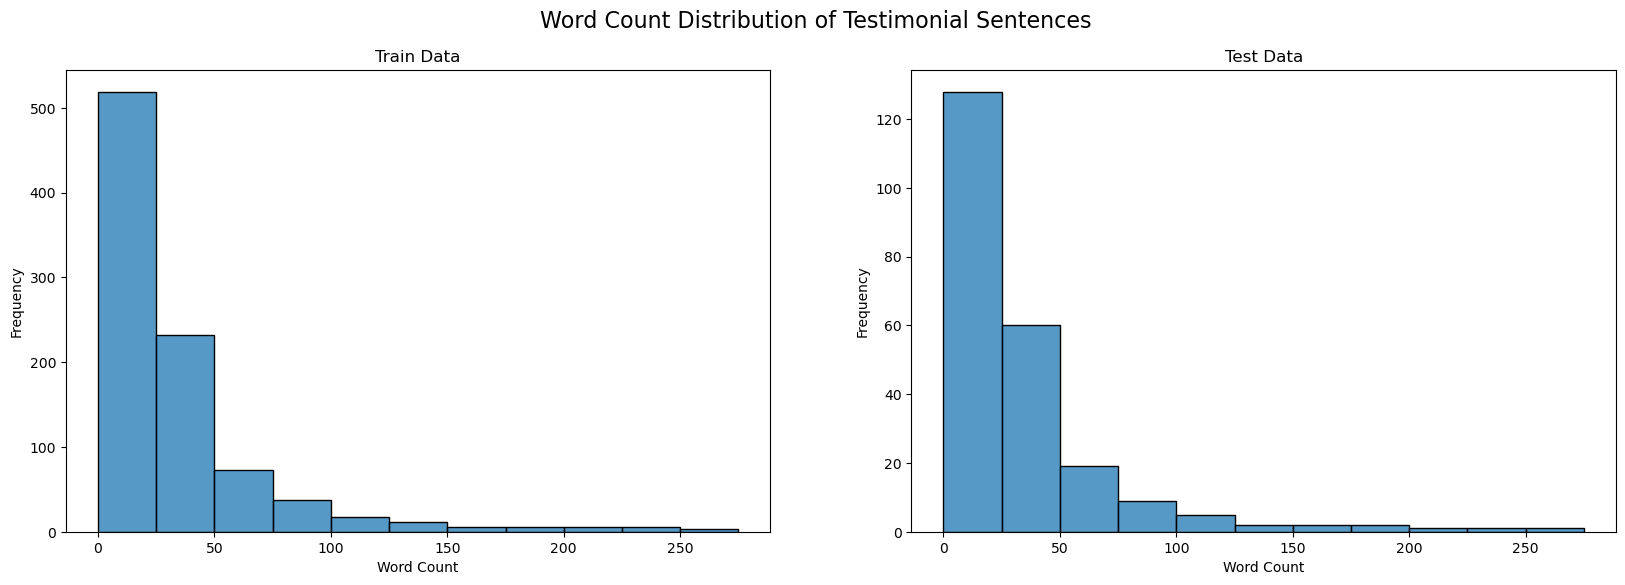

In [15]:
# Create a hist chart for both the train and test datasets showing the word count on the x-axis and frequency on the y-axis
# Each bar on the chart should be the same interval size as the bins created in the previous step
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
sns.histplot(data=train_df, x='length', bins=bins, ax=ax[0])
ax[0].set_title('Train Data')
ax[0].set_xlabel('Word Count')
ax[0].set_ylabel('Frequency')
sns.histplot(data=test_df, x='length', bins=bins, ax=ax[1])
ax[1].set_title('Test Data')
ax[1].set_xlabel('Word Count')
ax[1].set_ylabel('Frequency')

# Display a super title
fig.suptitle('Word Count Distribution of Testimonial Sentences', fontsize=16)









plt.show()

In [16]:
test_df.shape  

(230, 7)

In [17]:
train_df.shape

(918, 7)

In [18]:
# Drop the word_count_bin column
train_df = train_df.drop(columns=['word_count_bin'])
test_df = test_df.drop(columns=['word_count_bin'])



In [23]:
# Copy the train_df to two new dataframes called "unsloth_train_df" and "orpo_train_df"
unsloth_train_df = train_df.copy()
orpo_train_df = train_df.copy()

In [24]:
# Drop the "rejected" column from the "unsloth_train_df" dataframe
unsloth_train_df = unsloth_train_df.drop(columns=['rejected'])
unsloth_train_df.head()

,input,output,instruction,Label,length
439,"Compareerde voor de naargen:, gecommitteerde l...",There appeared before the undermentioned deleg...,You are a helpful assistant designed to help u...,5,167
360,"Voor de vertaling, [get.] B: D: Brouwer, onder...","For the translation, [signed] B. D. Brouwer, j...",You are a helpful assistant designed to help u...,4,8
719,Of den gev: siende dat hem over gem: meijd wie...,Whether the prisoner seeing that he was approa...,You are a helpful assistant designed to help u...,7,29
380,N:r de ola is soo vitieus datse allerwegen dis...,Note: the ola is so deficient that it is disco...,You are a helpful assistant designed to help u...,4,14
520,Antw: Verboden handel van slaven heb ik nooit ...,Answer: I have never conducted the forbidden t...,You are a helpful assistant designed to help u...,5,23


In [25]:
gptResponses.head()

,system,prompt,chosen,rejected
0,You are a helpful assistant designed to help u...,Please translate the following early modern Du...,"""Eijsch crimineel to death against the Christi...","""Criminal demand for death upon and against th..."
1,You are a helpful assistant designed to help u...,Please translate the following early modern Du...,"""Eisch crimineel to death, done, and made and ...","Criminal demand for death, executed, and made ..."
2,You are a helpful assistant designed to help u...,Please translate the following early modern Du...,"""against""","""upon and against"""
3,You are a helpful assistant designed to help u...,Please translate the following early modern Du...,"""Fernando, Roman Christian and Mocqua, residen...","Fernando, a Roman Christian and Mocqua inhabit..."
4,You are a helpful assistant designed to help u...,Please translate the following early modern Du...,"""Honourable lords,\nThe eijsscher says and is ...","Esteemed and honorable sirs, The plaintiff sta..."


In [26]:
# Rearrange the columns in the "orpo_train_df" dataframe so that they are "instruction", "input", "output", "rejected", "length"
orpo_train_df = orpo_train_df[['instruction', 'input', 'output', 'rejected', 'length', 'Label']]

# Rename the column "instruction" to "system" in the "orpo_train_df" dataframe and the column "input" to "prompt" and "output" to "chosen"
orpo_train_df = orpo_train_df.rename(columns={'instruction': 'system', 'input': 'prompt', 'output': 'chosen'})

orpo_train_df.head()

,system,prompt,chosen,rejected,length,Label
439,You are a helpful assistant designed to help u...,"Compareerde voor de naargen:, gecommitteerde l...",There appeared before the undermentioned deleg...,"Appeared before the present, commissioned memb...",167,5
360,You are a helpful assistant designed to help u...,"Voor de vertaling, [get.] B: D: Brouwer, onder...","For the translation, [signed] B. D. Brouwer, j...","For the translation, [signed] B: D: Brouwer, s...",8,4
719,You are a helpful assistant designed to help u...,Of den gev: siende dat hem over gem: meijd wie...,Whether the prisoner seeing that he was approa...,Of the said: seeing that she was being address...,29,7
380,You are a helpful assistant designed to help u...,N:r de ola is soo vitieus datse allerwegen dis...,Note: the ola is so deficient that it is disco...,The number of oils is so vitious that it unive...,14,4
520,You are a helpful assistant designed to help u...,Antw: Verboden handel van slaven heb ik nooit ...,Answer: I have never conducted the forbidden t...,Answer: I have never engaged in the forbidden ...,23,5


In [29]:
# Export the train and test datasets
orpo_train_df.to_csv('/Volumes/Extreme SSD/Thesis_Project/Data/training:test set/orpo_train.csv', index=False)

unsloth_train_df.to_csv('/Volumes/Extreme SSD/Thesis_Project/Data/training:test set/unsloth_train.csv', index=False)

test_df.to_csv('/Volumes/Extreme SSD/Thesis_Project/Data/training:test set/test_.csv', index=False)